In [9]:
import requests
import pandas as pd

In [11]:
def load_who_data(url):
    response = requests.get(url)
    data = response.json()
    return pd.json_normalize(data['value'])

# API URLs
urls = {
    "adult_obesity": "https://ghoapi.azureedge.net/api/NCD_BMI_30C",
    "child_obesity": "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C",
    "adult_underweight": "https://ghoapi.azureedge.net/api/NCD_BMI_18C",
    "child_thinness": "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"
}

datasets = {}
for name, url in urls.items():
    df = load_who_data(url)
    df["age_group"] = "Adult" if "adult" in name else "Child"
    datasets[name] = df

# Combining Data
df_obesity = pd.concat([datasets["adult_obesity"], datasets["child_obesity"]], ignore_index=True)
df_malnutrition = pd.concat([datasets["adult_underweight"], datasets["child_thinness"]], ignore_index=True)

# Converting 'Year' column to integer
df_obesity['Year'] = df_obesity['TimeDim'].astype(int)
df_malnutrition['Year'] = df_malnutrition['TimeDim'].astype(int)

# Filtering records from 2012 to 2022
df_obesity = df_obesity[df_obesity['Year'].between(2012, 2022)]
df_malnutrition = df_malnutrition[df_malnutrition['Year'].between(2012, 2022)]

# Reseting index
df_obesity.reset_index(drop=True, inplace=True)
df_malnutrition.reset_index(drop=True, inplace=True)


In [13]:
print(sorted(df_obesity['Year'].unique()))
print(sorted(df_malnutrition['Year'].unique()))

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [15]:
# Columns to keep
columns_to_keep = [
    "ParentLocation", "Dim1", "TimeDim", "Low", "High", "NumericValue", "SpatialDim", "age_group"
]

df_obesity = df_obesity[columns_to_keep].rename(columns={
    "ParentLocation": "Region",
    "Dim1": "Gender",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Mean_Estimate",
    "SpatialDim": "Country"
})

df_malnutrition = df_malnutrition[columns_to_keep].rename(columns={
    "ParentLocation": "Region",
    "Dim1": "Gender",
    "TimeDim": "Year",
    "Low": "LowerBound",
    "High": "UpperBound",
    "NumericValue": "Mean_Estimate",
    "SpatialDim": "Country"
})


In [17]:
df_obesity.head()

Region    Gender  Year  LowerBound  UpperBound  \
0               Americas   SEX_MLE  2017    32.93017    40.91354   
1  Eastern Mediterranean   SEX_MLE  2020    15.79378    19.24573   
2  Eastern Mediterranean   SEX_MLE  2020    23.08959    33.81534   
3                 Europe  SEX_FMLE  2014    24.92477    31.21326   
4                 Europe  SEX_FMLE  2019    28.16068    35.57493   

   Mean_Estimate Country age_group  
0       36.82630     BHS     Adult  
1       17.48764     IRN     Adult  
2       28.33553     IRQ     Adult  
3       27.94870     GRL     Adult  
4       31.89322     ARM     Adult

In [19]:
gender_map = {
    "SEX_MLE": "Male",
    "SEX_FMLE": "Female",
    "SEX_BTSX": "Both"
}
df_obesity["Gender"] = df_obesity["Gender"].map(gender_map)
df_malnutrition["Gender"] = df_malnutrition["Gender"].map(gender_map)


In [21]:
df_obesity.head(3)

Region Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
0               Americas   Male  2017    32.93017    40.91354       36.82630   
1  Eastern Mediterranean   Male  2020    15.79378    19.24573       17.48764   
2  Eastern Mediterranean   Male  2020    23.08959    33.81534       28.33553   

  Country age_group  
0     BHS     Adult  
1     IRN     Adult  
2     IRQ     Adult

In [23]:
print(df_obesity['Country'].unique())

['BHS' 'IRN' 'IRQ' 'GRL' 'ARM' 'MLT' 'PAN' 'IND' 'MDG' 'GIN' 'PHL' 'YEM'
 'JOR' 'BWA' 'NZL' 'MUS' 'BLR' 'BEL' 'UGA' 'MKD' 'ASM' 'GAB' 'GNQ' 'SEN'
 'BGR' 'PAK' 'TUV' 'ISR' 'NAM' 'UZB' 'DZA' 'GEO' 'KAZ' 'BDI' 'PYF' 'BOL'
 'HUN' 'COG' 'PRY' 'CHE' 'IRL' 'BRA' 'SWZ' 'LKA' 'LBR' 'WPR' 'VEN' 'WSM'
 'BLZ' 'WB_HI' 'KGZ' 'LSO' 'PNG' 'AUS' 'TKL' 'PER' 'RWA' 'MYS' 'SLV' 'MNE'
 'KOR' 'URY' 'CAN' 'EGY' 'TUR' 'BTN' 'MWI' 'PRK' 'THA' 'BRN' 'KWT' 'QAT'
 'WB_LMI' 'FSM' 'NIU' 'TON' 'PRT' 'CHN' 'HRV' 'LVA' 'BRB' 'CYP' 'UKR'
 'GTM' 'CIV' 'ZAF' 'AGO' 'LUX' 'LCA' 'DNK' 'NGA' 'SEAR' 'SRB' 'MOZ' 'HTI'
 'CUB' 'TUN' 'MAR' 'VCT' 'SUR' 'NER' 'CRI' 'DEU' 'COK' 'FIN' 'JAM' 'SSD'
 'ZWE' 'SWE' 'KIR' 'TTO' 'OMN' 'ETH' 'GHA' 'SDN' 'LBY' 'DMA' 'BGD' 'TCD'
 'ARG' 'COM' 'PLW' 'GRD' 'SLB' 'ERI' 'SVK' 'ITA' 'CMR' 'GNB' 'HND' 'NLD'
 'ECU' 'ALB' 'DOM' 'SOM' 'KEN' 'BHR' 'IDN' 'VUT' 'BMU' 'KNA' 'JPN' 'PRI'
 'NRU' 'SVN' 'AMR' 'GMB' 'USA' 'MRT' 'NOR' 'DJI' 'TJK' 'TLS' 'BFA' 'FRA'
 'MLI' 'TZA' 'GUY' 'SYR' 'ATG' 'AND' 'NPL' 'TKM' 'A

In [25]:
import pycountry
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}

def get_country_name(code):
    if code in special_cases:
        return special_cases[code]
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return "Unknown"

df_obesity['Country'] = df_obesity['Country'].apply(get_country_name)
df_malnutrition['Country'] = df_malnutrition['Country'].apply(get_country_name)

In [27]:
print(df_obesity['Country'].unique())

['Bahamas' 'Iran, Islamic Republic of' 'Iraq' 'Greenland' 'Armenia'
 'Malta' 'Panama' 'India' 'Madagascar' 'Guinea' 'Philippines' 'Yemen'
 'Jordan' 'Botswana' 'New Zealand' 'Mauritius' 'Belarus' 'Belgium'
 'Uganda' 'North Macedonia' 'American Samoa' 'Gabon' 'Equatorial Guinea'
 'Senegal' 'Bulgaria' 'Pakistan' 'Tuvalu' 'Israel' 'Namibia' 'Uzbekistan'
 'Algeria' 'Georgia' 'Kazakhstan' 'Burundi' 'French Polynesia'
 'Bolivia, Plurinational State of' 'Hungary' 'Congo' 'Paraguay'
 'Switzerland' 'Ireland' 'Brazil' 'Eswatini' 'Sri Lanka' 'Liberia'
 'Western Pacific Region' 'Venezuela, Bolivarian Republic of' 'Samoa'
 'Belize' 'High Income' 'Kyrgyzstan' 'Lesotho' 'Papua New Guinea'
 'Australia' 'Tokelau' 'Peru' 'Rwanda' 'Malaysia' 'El Salvador'
 'Montenegro' 'Korea, Republic of' 'Uruguay' 'Canada' 'Egypt' 'Türkiye'
 'Bhutan' 'Malawi' "Korea, Democratic People's Republic of" 'Thailand'
 'Brunei Darussalam' 'Kuwait' 'Qatar' 'Low & Middle Income'
 'Micronesia, Federated States of' 'Niue' 'Tonga' '

In [59]:
print(df_malnutrition['Country'].unique())

['Argentina' 'Gabon' 'Mongolia' 'Sierra Leone' 'South-East Asia Region'
 'Qatar' 'Uzbekistan' 'United Kingdom' 'Honduras' 'Vanuatu' 'Montenegro'
 'Trinidad and Tobago' 'Cook Islands' 'Lesotho' 'Germany' 'Gambia'
 'Low Income' 'Venezuela, Bolivarian Republic of' 'Cyprus' 'Congo' 'Niue'
 'Algeria' 'Latvia' 'Palau' 'Croatia' 'Peru' 'Tonga' 'Afghanistan' 'Italy'
 'Myanmar' 'Benin' 'Kiribati' 'Malta' 'Jamaica' 'Maldives'
 'Bolivia, Plurinational State of' 'Kyrgyzstan' 'Lithuania' 'South Africa'
 'Ecuador' 'Greece' 'Australia' 'El Salvador' 'Malawi' 'Nauru'
 'Seychelles' 'Paraguay' 'Singapore' 'Tanzania, United Republic of'
 'Guatemala' 'Palestine, State of' 'Congo, The Democratic Republic of the'
 'Netherlands' 'Iraq' "Korea, Democratic People's Republic of"
 'Bosnia and Herzegovina' 'Costa Rica' 'Antigua and Barbuda'
 'American Samoa' 'Sudan' 'Guinea-Bissau' 'Belarus' 'Chile' 'Grenada'
 'Dominican Republic' 'Africa' 'Turkmenistan' 'Libya' 'Thailand'
 'Americas Region' 'Bulgaria' 'Saint Kit

In [29]:
for df in [df_obesity, df_malnutrition]:
    df['CI_Width'] = df['UpperBound'] - df['LowerBound']

def categorize_obesity(val):
    if val >= 30:
        return 'High'
    elif 25 <= val < 30:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(categorize_obesity)

def categorize_malnutrition(val):
    if val >= 20:
        return 'High'
    elif 10 <= val < 20:
        return 'Moderate'
    else:
        return 'Low'

df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate'].apply(categorize_malnutrition)


In [31]:
df_obesity.head(3)

Region Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
0               Americas   Male  2017    32.93017    40.91354       36.82630   
1  Eastern Mediterranean   Male  2020    15.79378    19.24573       17.48764   
2  Eastern Mediterranean   Male  2020    23.08959    33.81534       28.33553   

                     Country age_group  CI_Width obesity_level  
0                    Bahamas     Adult   7.98337          High  
1  Iran, Islamic Republic of     Adult   3.45195           Low  
2                       Iraq     Adult  10.72575      Moderate

In [33]:
df_malnutrition.head(3)

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
0         Americas    Male  2013     0.94316     1.89881        1.36614   
1           Africa  Female  2021     3.97204     8.07702        5.79511   
2  Western Pacific    Both  2017     2.42823     3.84215        3.09065   

     Country age_group  CI_Width malnutrition_level  
0  Argentina     Adult   0.95565                Low  
1      Gabon     Adult   4.10498                Low  
2   Mongolia     Adult   1.41392                Low

Exploratory Data Analysis

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore') 

In [38]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         26268 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [40]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

In [42]:
df_obesity[df_obesity['Region'].isnull()]

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
47      None  Female  2016     5.97094     6.69670        6.32492   
51      None  Female  2019    24.96376    26.62476       25.78362   
80      None  Female  2017    12.17208    12.88631       12.52030   
114     None  Female  2022     9.59137    11.65303       10.58516   
228     None    Male  2021    29.18699    32.26798       30.72531   
...      ...     ...   ...         ...         ...            ...   
27591   None    Male  2020     3.20817     6.37546        4.61066   
27603   None    Male  2020     8.13985     9.99596        9.01322   
27608   None    Male  2014     3.99578     5.02188        4.48780   
27615   None    Male  2022     9.03633    14.08650       11.42993   
27700   None    Male  2013    13.51718    14.52825       14.01187   

                            Country age_group  CI_Width obesity_level  
47           Western Pacific Region     Adult   0.72576           Low  
51                      High Income     Adult   1.66100      Moderate  
80              Low & Middle Income     Adult   0.71423           Low  
114          South-East Asia Region     Adult   2.06166           Low  
228                 Americas Region     Adult   3.08099          High  
...                             ...       ...       ...           ...  
27591                    Low Income     Child   3.16729           Low  
27603                        Europe     Child   1.85611           Low  
27608        South-East Asia Region     Child   1.02610           Low  
27615  Eastern Mediterranean Region     Child   5.05017           Low  
27700                   High Income     Child   1.01107           Low  

[1452 rows x 10 columns]

In [44]:
df_obesity['Country'] = df_obesity['Country'].str.strip().str.title()

In [46]:
unmapped_countries = df_obesity[df_obesity['Region'].isnull()]['Country'].unique()
print("Countries not mapped to region:", unmapped_countries)

Countries not mapped to region: ['Western Pacific Region' 'High Income' 'Low & Middle Income'
 'South-East Asia Region' 'Americas Region' 'Low Income' 'Global'
 'Eastern Mediterranean Region' 'Upper Middle Income' 'Europe' 'Africa']


In [48]:
group_region_map = {
    'Western Pacific Region': 'Western Pacific',
    'South-East Asia Region': 'South-East Asia',
    'Eastern Mediterranean Region': 'Eastern Mediterranean',
    'Americas Region': 'Americas',
    'Europe': 'Europe',
    'Africa': 'Africa',
    'Global': 'Global',
    'High Income': 'High Income',
    'Upper Middle Income': 'Upper Middle Income',
    'Low & Middle Income': 'Low & Middle Income',
    'Low Income': 'Low Income'
}

df_obesity['Region'] = df_obesity['Region'].fillna(df_obesity['Country'].map(group_region_map))


In [50]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         27720 non-null  object 
 1   Gender         27720 non-null  object 
 2   Year           27720 non-null  int64  
 3   LowerBound     27720 non-null  float64
 4   UpperBound     27720 non-null  float64
 5   Mean_Estimate  27720 non-null  float64
 6   Country        27720 non-null  object 
 7   age_group      27720 non-null  object 
 8   CI_Width       27720 non-null  float64
 9   obesity_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [52]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              26268 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   LowerBound          27720 non-null  float64
 4   UpperBound          27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             27720 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   malnutrition_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [54]:
df_malnutrition[df_malnutrition['Region'].isnull()]

Region  Gender  Year  LowerBound  UpperBound  Mean_Estimate  \
4       None    Both  2021    12.24232    14.44287       13.33635   
16      None    Both  2017    14.13334    15.93287       15.01926   
27      None    Male  2022    10.75729    14.52130       12.59957   
32      None    Both  2012    14.95938    16.63975       15.77978   
85      None    Male  2018    11.74841    13.96063       12.83258   
...      ...     ...   ...         ...         ...            ...   
27633   None    Both  2019     4.47263     5.47676        4.94792   
27640   None  Female  2014     8.12023    10.25340        9.15886   
27647   None    Both  2015     2.02092     2.25833        2.13708   
27693   None    Both  2020     5.99288     8.78724        7.28458   
27711   None    Both  2020     9.94041    12.50447       11.19899   

                            Country age_group  CI_Width malnutrition_level  
4            South-East Asia Region     Adult   2.20055           Moderate  
16                       Low Income     Adult   1.79953           Moderate  
27           South-East Asia Region     Adult   3.76401           Moderate  
32                       Low Income     Adult   1.68037           Moderate  
85                           Africa     Adult   2.21222           Moderate  
...                             ...       ...       ...                ...  
27633        Western Pacific Region     Child   1.00413                Low  
27640  Eastern Mediterranean Region     Child   2.13317                Low  
27647                   High Income     Child   0.23741                Low  
27693                    Low Income     Child   2.79436                Low  
27711  Eastern Mediterranean Region     Child   2.56406           Moderate  

[1452 rows x 10 columns]

In [56]:
df_malnutrition['Country'] = df_malnutrition['Country'].str.strip().str.title()
unmapped_countries = df_malnutrition[df_malnutrition['Region'].isnull()]['Country'].unique()
print("Countries not mapped to region:", unmapped_countries)

Countries not mapped to region: ['South-East Asia Region' 'Low Income' 'Africa' 'Americas Region'
 'High Income' 'Low & Middle Income' 'Eastern Mediterranean Region'
 'Europe' 'Upper Middle Income' 'Western Pacific Region' 'Global']


In [58]:
group_region_map = {
    'Western Pacific Region': 'Western Pacific',
    'South-East Asia Region': 'South-East Asia',
    'Eastern Mediterranean Region': 'Eastern Mediterranean',
    'Americas Region': 'Americas',
    'Europe': 'Europe',
    'Africa': 'Africa',
    'Global': 'Global',
    'High Income': 'High Income',
    'Upper Middle Income': 'Upper Middle Income',
    'Low & Middle Income': 'Low & Middle Income',
    'Low Income': 'Low Income'
}

df_malnutrition['Region'] = df_malnutrition['Region'].fillna(df_malnutrition['Country'].map(group_region_map))


In [60]:
df_malnutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              27720 non-null  object 
 1   Gender              27720 non-null  object 
 2   Year                27720 non-null  int64  
 3   LowerBound          27720 non-null  float64
 4   UpperBound          27720 non-null  float64
 5   Mean_Estimate       27720 non-null  float64
 6   Country             27720 non-null  object 
 7   age_group           27720 non-null  object 
 8   CI_Width            27720 non-null  float64
 9   malnutrition_level  27720 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.1+ MB


In [62]:
df_obesity.describe()

Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      9.393155     17.068489      12.761041      7.675334
std        3.162335      9.893854     12.395013      10.858925      6.616899
min     2012.000000      0.077540      0.547850       0.265670      0.216700
25%     2014.000000      2.354430      7.875503       4.753960      2.926715
50%     2017.000000      6.506535     13.704380       9.944540      5.480535
75%     2020.000000     12.697755     23.986050      17.482418     10.338880
max     2022.000000     74.365370     87.868510      80.609250     40.554060

In [64]:
df_malnutrition.describe()

Year    LowerBound    UpperBound  Mean_Estimate      CI_Width
count  27720.000000  27720.000000  27720.000000   27720.000000  27720.000000
mean    2017.000000      3.397094      8.147889       5.354451      4.750795
std        3.162335      3.908061      6.443692       4.811220      4.257684
min     2012.000000      0.023700      0.354830       0.175310      0.166680
25%     2014.000000      1.053662      3.143305       2.039283      1.603222
50%     2017.000000      1.907975      6.095555       3.597790      3.351095
75%     2020.000000      4.186443     11.526302       7.335245      6.530875
max     2022.000000     31.365400     43.680290      35.894110     26.701740

In [66]:
# Mean
mean_values = df_obesity.mean(numeric_only=True)

# Median
median_values = df_obesity.median(numeric_only=True)

# Mode
mode_values = df_obesity.mode(numeric_only=True).iloc[0]

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)


Mean:
 Year             2017.000000
LowerBound          9.393155
UpperBound         17.068489
Mean_Estimate      12.761041
CI_Width            7.675334
dtype: float64

Median:
 Year             2017.000000
LowerBound          6.506535
UpperBound         13.704380
Mean_Estimate       9.944540
CI_Width            5.480535
dtype: float64

Mode:
 Year             2012.00000
LowerBound          0.81577
UpperBound          8.93466
Mean_Estimate       1.12344
CI_Width            0.77555
Name: 0, dtype: float64


In [68]:
summary_stats = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

print(summary_stats)


                      Mean       Median        Mode
Year           2017.000000  2017.000000  2012.00000
LowerBound        9.393155     6.506535     0.81577
UpperBound       17.068489    13.704380     8.93466
Mean_Estimate    12.761041     9.944540     1.12344
CI_Width          7.675334     5.480535     0.77555


In [135]:
df_obesity.duplicated().sum()

0

### 1. 📊 Distribution of Mean_Estimate and CI_Width

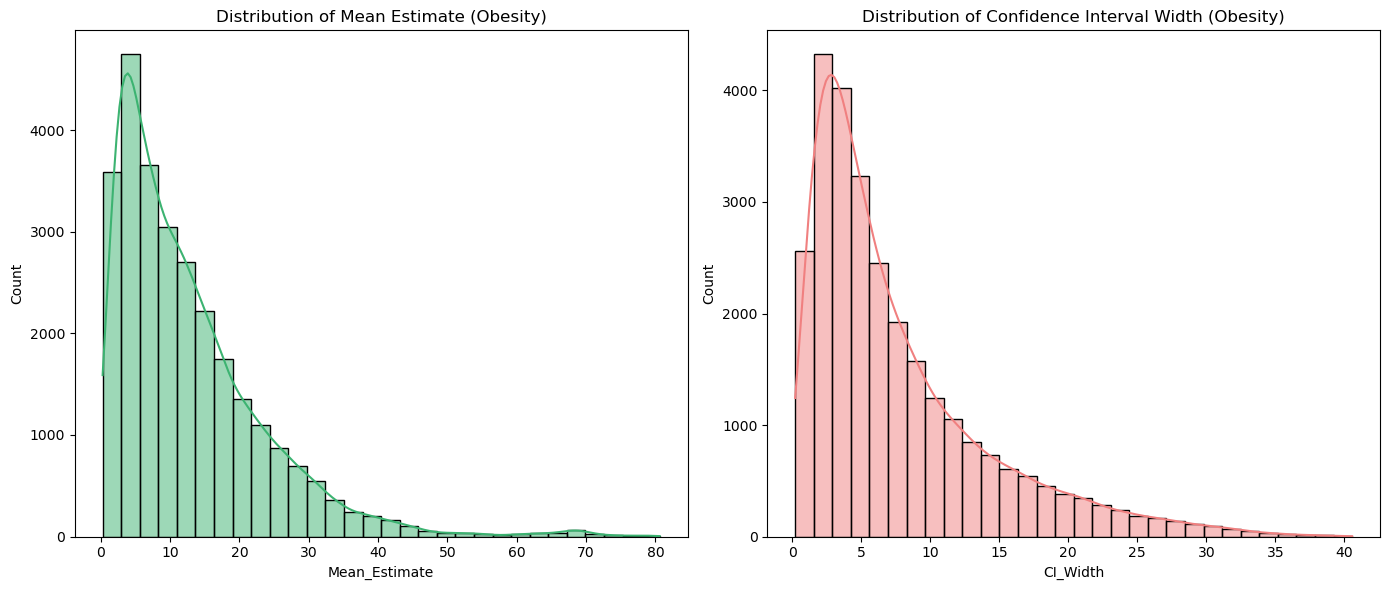

In [71]:
plt.figure(figsize=(14, 6))
# Mean_Estimate Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_obesity['Mean_Estimate'], kde=True, bins=30, color='mediumseagreen')
plt.title('Distribution of Mean Estimate (Obesity)')

# CI_Width Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_obesity['CI_Width'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Confidence Interval Width (Obesity)')

plt.tight_layout()
plt.show()


### Distribution Summary

#### Mean Estimate
• Most values are between 0 and 10, meaning the average estimate is usually low.
• The chart is right-skewed, which means many small values and fewer large ones.
• Some values go above 70, which are outliers.
• The peak is sharp and high, showing lepto kurtosis.

#### Confidence Interval Width (CI_Width)
• Most values are between 0 and 10.
• Also right-skewed, with fewer values above 30.
• The shape is also tall and narrow, meaning it has lepto kurtosis.

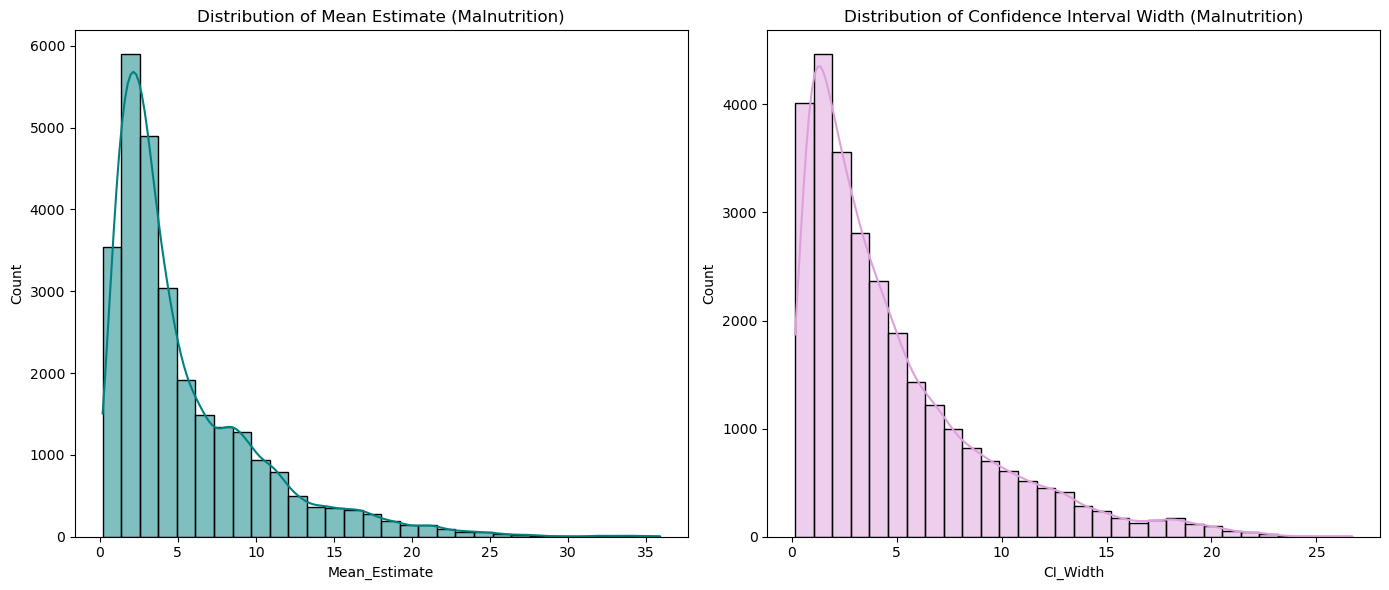

In [74]:
plt.figure(figsize=(14, 6))
# Mean_Estimate Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_malnutrition['Mean_Estimate'], kde=True, bins=30, color='teal')
plt.title('Distribution of Mean Estimate (Malnutrition)')

# CI_Width Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_malnutrition['CI_Width'], kde=True, bins=30, color='plum')
plt.title('Distribution of Confidence Interval Width (Malnutrition)')

plt.tight_layout()
plt.show()


### **Distribution Insights**
#### **Mean Estimate Distribution**
•Most values are between 0 and 5, meaning the mean estimate is usually small.
•The shape is right-skewed – more values on the left, fewer on the right.
•A few values go above 30, which are outliers.
•The curve is tall and sharp at the beginning — this means it has lepto kurtosis.

#### **Confidence Interval Width (CI_Width) Distribution **
•Most values are again between 0 and 5.
•Also right-skewed – a few values go above 20, showing some estimates are less precise.
•This chart also shows lepto kurtosis.

#### Log Transformation

In [247]:
import numpy as np

df_obesity['Log_Mean_Estimate'] = np.log1p(df_obesity['Mean_Estimate'])
df_obesity['Log_CI_Width'] = np.log1p(df_obesity['CI_Width'])

df_malnutrition['Log_Mean_Estimate'] = np.log1p(df_malnutrition['Mean_Estimate'])
df_malnutrition['Log_CI_Width'] = np.log1p(df_malnutrition['CI_Width'])


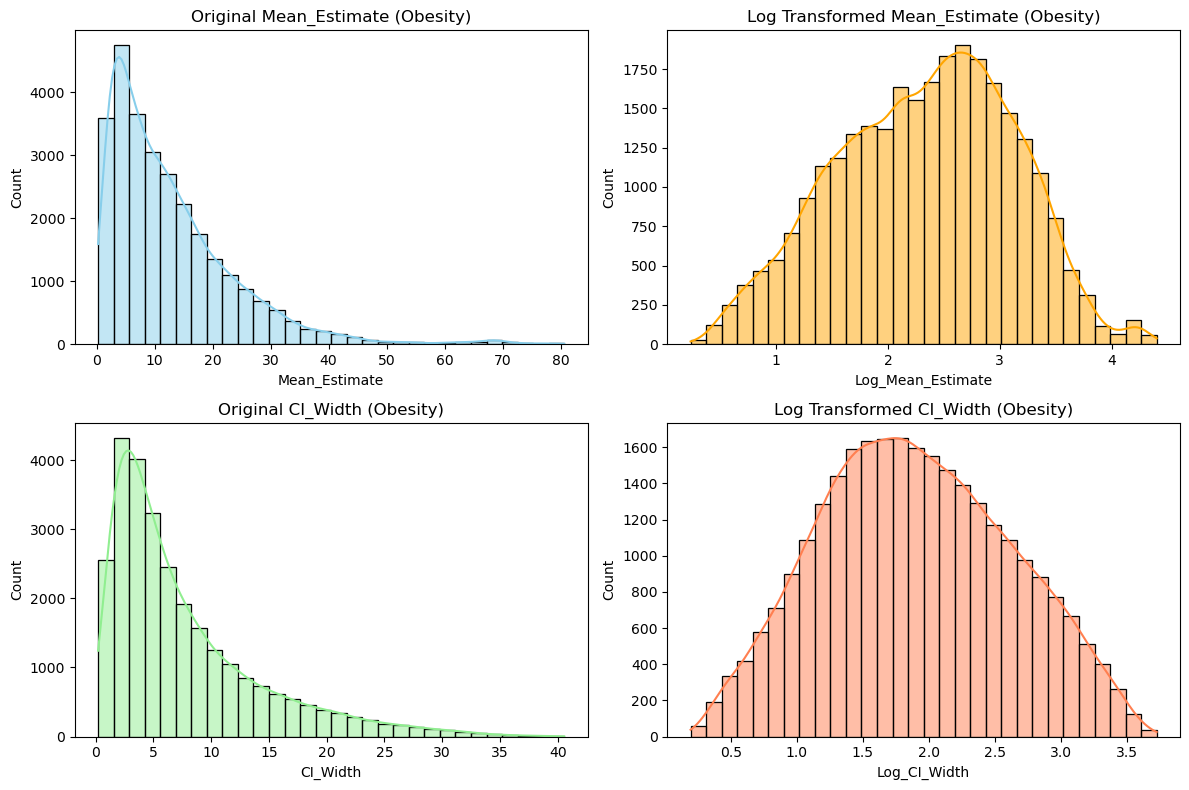

In [253]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Mean Estimate
sns.histplot(df_obesity['Mean_Estimate'], bins=30, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Original Mean_Estimate (Obesity)")
sns.histplot(df_obesity['Log_Mean_Estimate'], bins=30, kde=True, ax=axes[0, 1], color='orange')
axes[0, 1].set_title("Log Transformed Mean_Estimate (Obesity)")

# CI_Width
sns.histplot(df_obesity['CI_Width'], bins=30, kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Original CI_Width (Obesity)")
sns.histplot(df_obesity['Log_CI_Width'], bins=30, kde=True, ax=axes[1, 1], color='coral')
axes[1, 1].set_title("Log Transformed CI_Width (Obesity)")

plt.tight_layout()
plt.show()

###  Distribution Insights: Obesity Dataset

- **Mean_Estimate (Before Transformation)**: The distribution is **right-skewed**, meaning most countries have low obesity levels, but a few have extremely high values.
- **Mean_Estimate (After Log Transformation)**: The skewness is significantly reduced, making the distribution more **normally distributed**. This helps in better visual interpretation and improves model performance.
- **CI_Width (Before Transformation)**: The confidence interval width is also **right-skewed**, suggesting that a few countries have very uncertain or highly variable data.
- **CI_Width (After Log Transformation)**: The transformation compresses the spread, helping to better visualize variability and reduce the influence of large outliers.

 **Conclusion**: Log transformation is beneficial for this dataset.


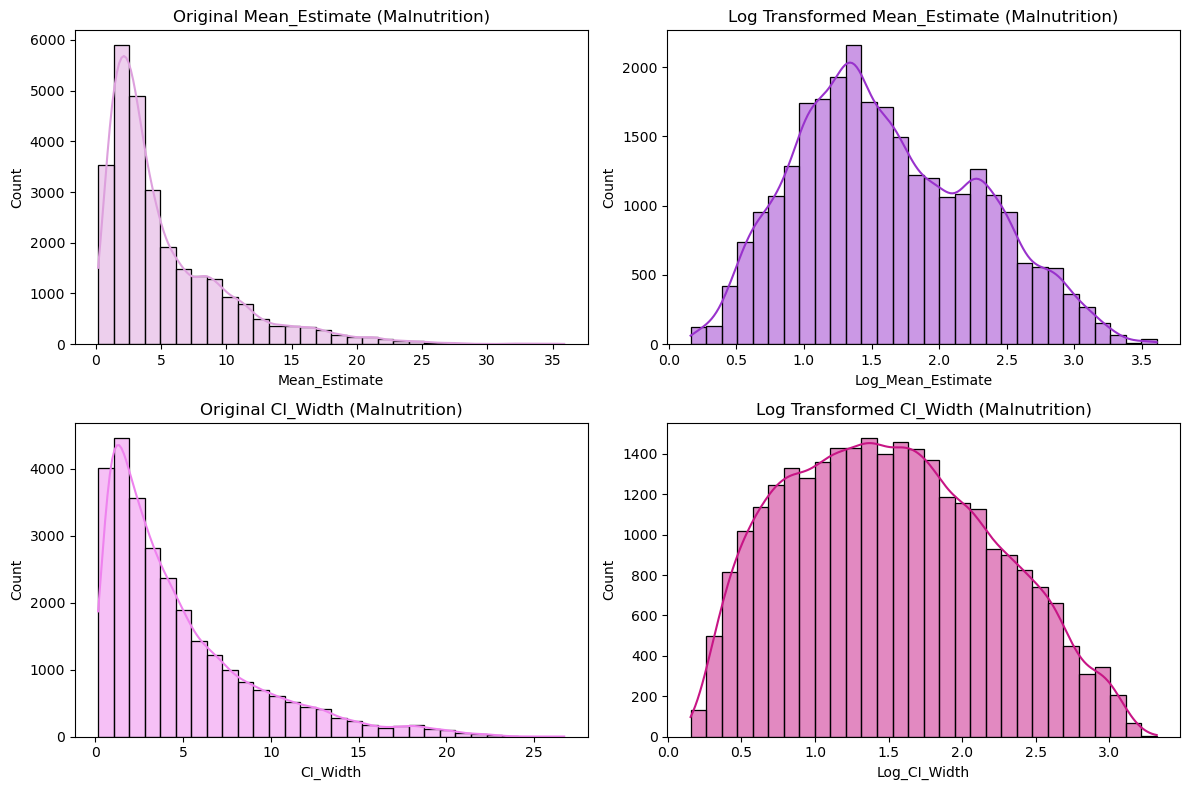

In [263]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Mean_Estimate
sns.histplot(df_malnutrition['Mean_Estimate'], bins=30, kde=True, ax=axes[0, 0], color='plum')
axes[0, 0].set_title("Original Mean_Estimate (Malnutrition)")
sns.histplot(df_malnutrition['Log_Mean_Estimate'], bins=30, kde=True, ax=axes[0, 1], color='darkorchid')
axes[0, 1].set_title("Log Transformed Mean_Estimate (Malnutrition)")

# CI_Width
sns.histplot(df_malnutrition['CI_Width'], bins=30, kde=True, ax=axes[1, 0], color='violet')
axes[1, 0].set_title("Original CI_Width (Malnutrition)")
sns.histplot(df_malnutrition['Log_CI_Width'], bins=30, kde=True, ax=axes[1, 1], color='mediumvioletred')
axes[1, 1].set_title("Log Transformed CI_Width (Malnutrition)")

plt.tight_layout()
plt.show()


### 🔍 Distribution Insights: Malnutrition Dataset

- **Mean_Estimate (Before Transformation)**: The distribution shows strong **positive skewness**, with most countries having lower malnutrition rates, and a few having very high values.
- **Mean_Estimate (After Log Transformation)**: The transformation reduces skewness, resulting in a more balanced distribution. This is important for techniques that assume normality.
- **CI_Width (Before Transformation)**: A few records have extremely large CI widths, indicating poor reliability or inconsistent data collection.
- **CI_Width (After Log Transformation)**: The spread becomes more uniform, which helps in fairer comparisons across countries or groups.

 **Conclusion**: Applying log transformation improves the data quality by making distributions less skewed and more suitable for statistical analysis.


### 2. 📈 Trend Over Years 

In [82]:
region_trend = df_obesity.groupby(['Region', 'Year'], as_index=False)['Mean_Estimate'].mean()

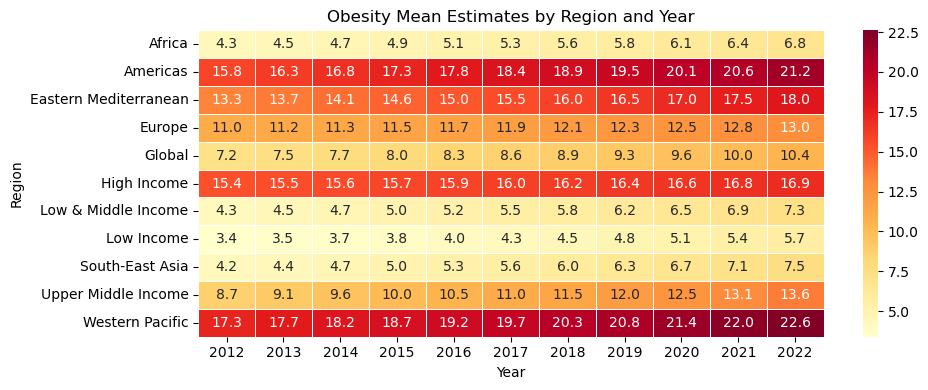

In [84]:
pivot = region_trend.pivot(index='Region', columns='Year', values='Mean_Estimate')

plt.figure(figsize=(10, 4))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)

plt.title("Obesity Mean Estimates by Region and Year")
plt.xlabel("Year")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


### **Heatmap Analysis: Obesity Mean Estimates by Region and Year**
#### **Trend Over Time:**
##### •Most regions show a steady increase in obesity estimates over the years.
##### •Regions like Western Pacific and Americas exhibit consistently high obesity levels.
##### •Western Pacific shows the highest obesity mean estimates, reaching 22.6% in 2022.
##### •Low Income and Africa regions have the lowest obesity estimates, under 7%.
##### •High Income and Americas also show relatively high and rising trends.

#### **Color Interpretation:**
##### •Lighter shades (yellow) indicate lower obesity rates.
##### •Darker shades (red) indicate higher obesity rates.

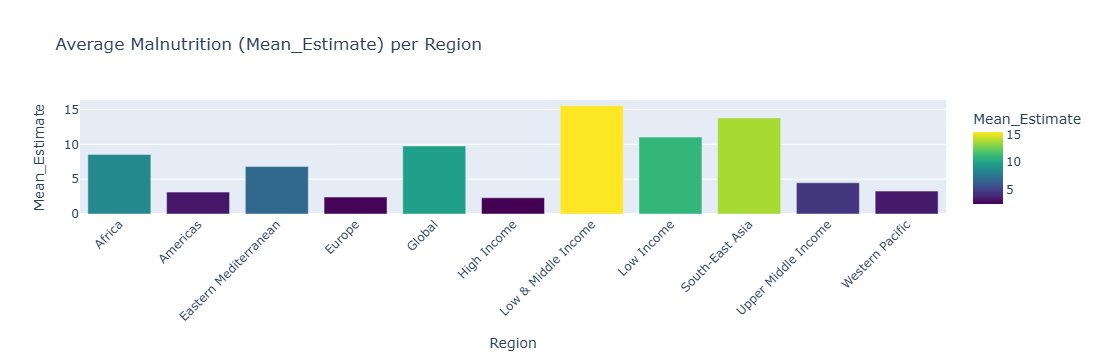

In [87]:
import plotly.express as px

region_mean = df_malnutrition.groupby('Region')['Mean_Estimate'].mean().reset_index()

fig = px.bar(
    region_mean,
    x='Region',
    y='Mean_Estimate',
    color='Mean_Estimate',
    title="Average Malnutrition (Mean_Estimate) per Region",
    color_continuous_scale='Viridis'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### **Insights from the Visualization:**

##### •The Middle Income region has the highest average malnutrition estimate, reaching close to 15%, indicating a significant public health concern.
##### •South-East Asia and Low Income regions also show high malnutrition levels, both averaging above 10%.
##### •These areas may require prioritized interventions and nutritional programs.
##### •High Income, Europe, and the Western Pacific regions show the lowest average malnutrition, generally staying below 5%.

#### **Color Representation:**
•The color gradient from blue to yellow reflects increasing malnutrition levels, making it easier to visually identify the most and least affected regions.

### 3. Compare Across Demographic Groups (Sex, Age Group)

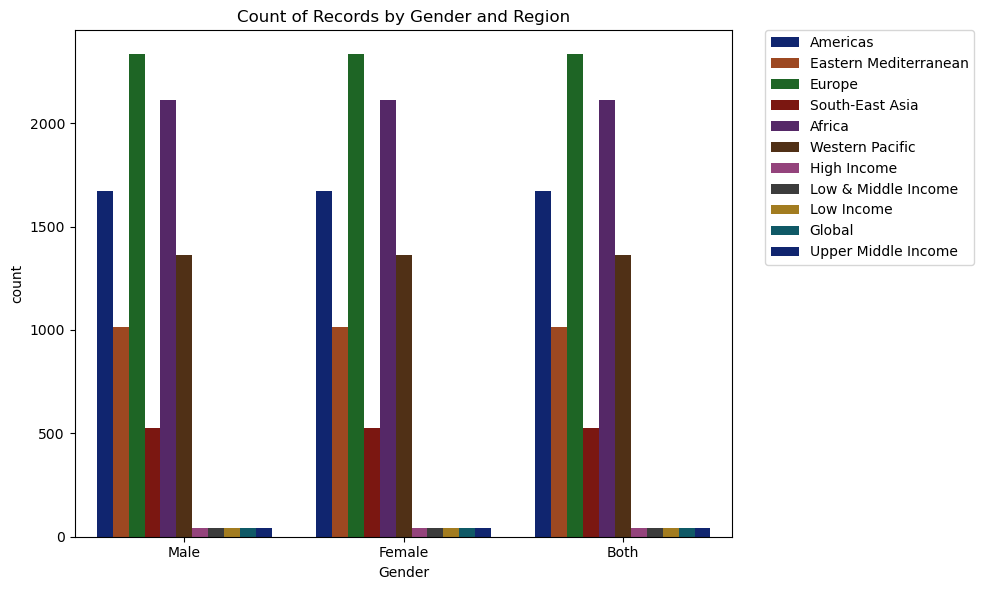

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_obesity, x='Gender', hue='Region', palette='dark')
plt.title("Count of Records by Gender and Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

###  Gender-wise Distribution Across Regions

- **Balanced Gender Representation**:
  - All three gender categories (Male, Female, Both) have **similar counts**, indicating that the dataset is **evenly distributed** across genders.
- **Top Contributing Regions**:
  - **Europe**, **Low & Middle Income**, and **Upper Middle Income** regions have the **highest number of records** across all genders.
  - This implies more data availability or reporting frequency in these regions.
- **Underrepresented Regions**:
  - **Low Income**, **Global**, and **High Income** regions have significantly **fewer data entries**, especially in the “Both” category.
  - Analysts should be cautious when comparing these regions due to possible **sampling bias** or **incomplete data**.
- **Consistency Across Genders**:
  - Most regions show a **consistent count across Male, Female, and Both**, suggesting that gender-segmented data is evenly recorded.

 **Conclusion**:
This distribution plot confirms that while gender representation is balanced, some regions dominate the dataset, which could **influence global average calculations** or **skew region-based comparisons**. 


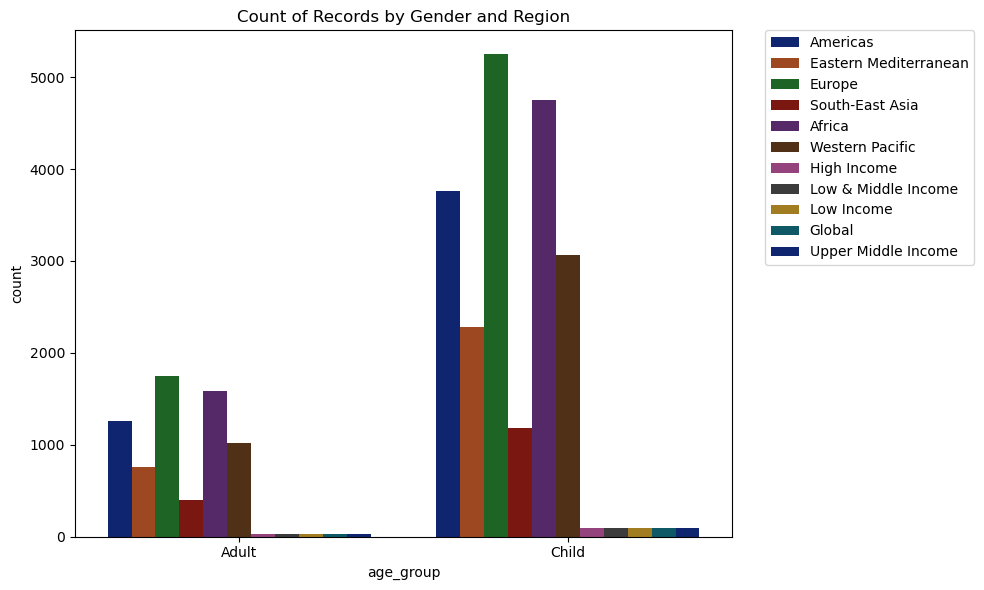

In [119]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_obesity, x='age_group', hue='Region', palette='dark')
plt.title("Count of Records by Gender and Region")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

### 🔍 Insights from the Visualization: Count of Records by Gender and Region

- The **"High Income"** region has the highest number of records, exceeding **5000**, which indicates that data availability or reporting is higher in these countries.
- Both **Western Pacific** and **South-East Asia** also show high counts (above 4000), making them key regions for further focused analysis in gender-nutrition trends.
- **Africa**, **Europe**, and **Global** categories fall into a moderate range of record counts (~2000–3000), suggesting fair representation but with room for more comprehensive data collection.
- Regions like **Eastern Mediterranean**, **Low Income**, and **Upper Middle Income** show comparatively lower data counts, possibly due to reporting gaps or fewer studies.
- There is a **noticeable imbalance** in record counts across regions. This could potentially introduce bias in global trend analysis unless weighted or normalized.

### **4. Obesity vs Malnutrition**

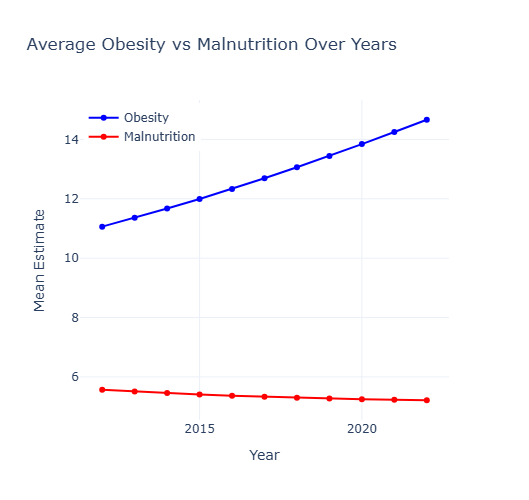

In [125]:
import plotly.graph_objects as go
obesity_trend = df_obesity.groupby('Year')['Mean_Estimate'].mean().reset_index()
malnutrition_trend = df_malnutrition.groupby('Year')['Mean_Estimate'].mean().reset_index()

fig = go.Figure()

# Add Obesity trend line
fig.add_trace(go.Scatter(
    x=obesity_trend['Year'],
    y=obesity_trend['Mean_Estimate'],
    mode='lines+markers',
    name='Obesity',
    line=dict(color='blue')
))

# Add Malnutrition trend line
fig.add_trace(go.Scatter(
    x=malnutrition_trend['Year'],
    y=malnutrition_trend['Mean_Estimate'],
    mode='lines+markers',
    name='Malnutrition',
    line=dict(color='red')
))

fig.update_layout(
    title='Average Obesity vs Malnutrition Over Years',
    xaxis_title='Year',
    yaxis_title='Mean Estimate',
    legend=dict(x=0.01, y=0.99),
    template='plotly_white',
    width=900,
    height=500
)
fig.show()


### **Insights on Average Obesity vs Malnutrition Over Years:**

##### **Rising Obesity Rates:**
##### There is a consistent upward trend in obesity from 2012 to 2022.
##### The mean estimate of obesity increased from around 11 in 2012 to 14.5 in 2022, indicating a growing public health concern.

##### **Stable Malnutrition Rates:**
##### In contrast, malnutrition rates have remained almost constant over the years.
##### The values are consistently around 5.5.


#### Multivariate Analysis

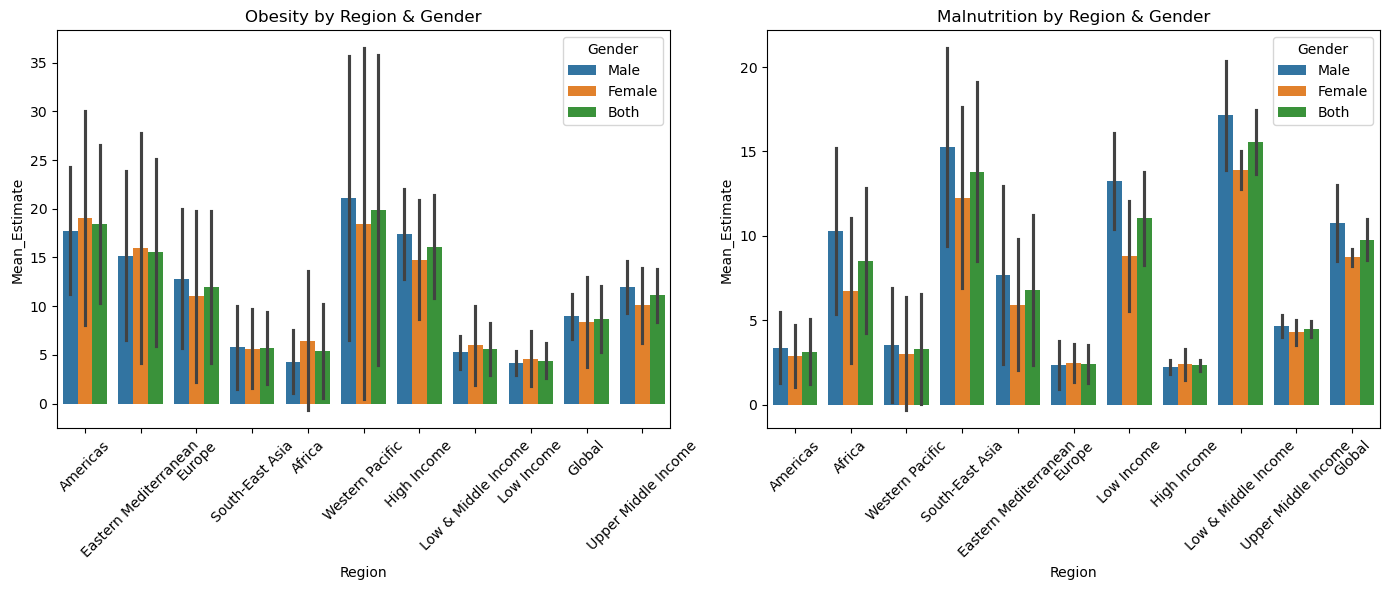

In [147]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Region', y='Mean_Estimate', hue='Gender', data=df_obesity, ci='sd')
plt.title('Obesity by Region & Gender')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Region', y='Mean_Estimate', hue='Gender', data=df_malnutrition, ci='sd')
plt.title('Malnutrition by Region & Gender')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 📊 Insights: Obesity vs. Malnutrition by Region & Gender
####  Obesity Analysis:
- **Western Pacific** and **High Income** regions show the **highest obesity estimates**, especially for **males**.
- **Africa** and **South-East Asia** have the **lowest obesity levels** across all genders.
- In most regions, **males exhibit slightly higher obesity rates** than females.
- The **Western Pacific** region has **large error bars**, indicating high variability in obesity data.

####  Malnutrition Analysis:
- **Africa**, **South-East Asia**, and **Western Pacific** regions have **high malnutrition estimates**, especially for **males**.
- **Europe** and **High Income** regions show **low malnutrition**, suggesting better nutrition access.
- Similar to obesity, **males tend to have higher malnutrition estimates** in many regions.
- Malnutrition shows an **opposite pattern** to obesity — regions with high malnutrition tend to have low obesity, and vice versa.

####  Comparative Insight: Nutrition Paradox
- A clear **"Double Burden of Malnutrition"** is visible:
  - **Low-income regions** like **Africa** and **South-East Asia** suffer from **undernutrition**.
  - **High-income regions** face **overnutrition** problems (obesity).
- **Gender patterns** are consistent — **males show higher estimates** in both cases.
- Highlights the need for **region-specific** health and nutrition interventions.


####  Choropleth Map

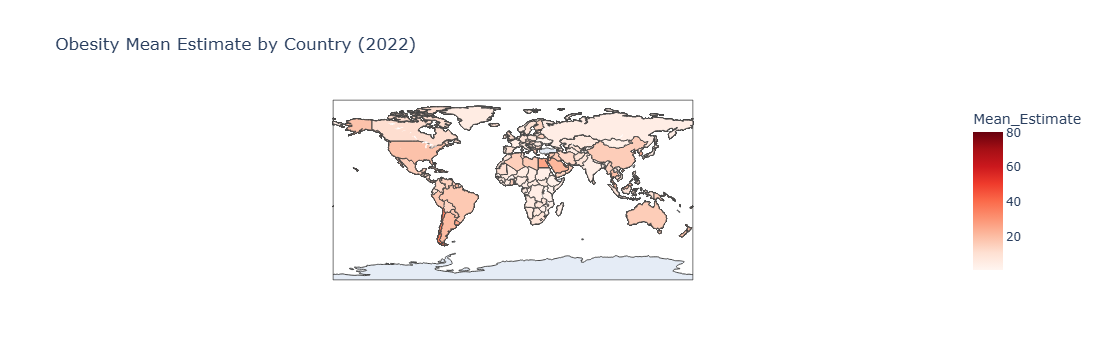

In [133]:
import plotly.express as px

latest_year = df_obesity['Year'].max()
df_latest = df_obesity[df_obesity['Year'] == latest_year]

fig = px.choropleth(
    df_latest,
    locations='Country',
    locationmode='country names',
    color='Mean_Estimate',
    hover_name='Country',
    color_continuous_scale='Reds',
    title=f"Obesity Mean Estimate by Country ({latest_year})"
)
fig.show()


### 🌍 Insights: Obesity Mean Estimate by Country (2022)

- The world map visualization shows a clear variation in obesity mean estimates across different countries in 2022, using a red gradient to indicate severity.
- Countries in **North America**, parts of the **Middle East**, and some **Pacific Islands** show the **deepest red shades**, indicating **high mean obesity estimates**, possibly above **60–80%** in certain regions.
- Countries like **India**, **China**, and neighboring Asian nations show **lighter shades**, suggesting **lower obesity prevalence** — generally **under 40%**.
- African countries display a **mixed pattern** — some regions, especially **Northern and Southern Africa**, show moderate obesity levels, while central regions remain lighter, indicating lower prevalence.

### Insert Data into SQL

In [163]:
import pymysql

# Connect to MySQL
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='9787857873t.',
    autocommit=True
)
cursor = connection.cursor()

# Create database
cursor.execute("CREATE DATABASE IF NOT EXISTS Nutrition_Paradox;")
cursor.execute("USE Nutrition_Paradox;")

# Create obesity_level table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS obesity_level (
        Region VARCHAR(100),
        Gender VARCHAR(20),
        Year INT,
        LowerBound FLOAT,
        UpperBound FLOAT,
        Mean_Estimate FLOAT,
        Country VARCHAR(100),
        age_group VARCHAR(50),
        CI_Width FLOAT,
        obesity_level VARCHAR(50)
    );
""")

# Create malnutrition_level table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS malnutrition_level (
        Region VARCHAR(100),
        Gender VARCHAR(20),
        Year INT,
        LowerBound FLOAT,
        UpperBound FLOAT,
        Mean_Estimate FLOAT,
        Country VARCHAR(100),
        age_group VARCHAR(50),
        CI_Width FLOAT,
        malnutrition_level VARCHAR(50)
    );
""")

# Insert data into obesity_level
for _, row in df_obesity.iterrows():
    cursor.execute("""
        INSERT INTO obesity_level (Region, Gender, Year, LowerBound, UpperBound,
        Mean_Estimate, Country, age_group, CI_Width, obesity_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """, (
        row['Region'],
        row['Gender'],
        int(row['Year']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        float(row['Mean_Estimate']),
        row['Country'],
        row['age_group'],
        float(row['CI_Width']),
        row['obesity_level']
    ))

# Insert data into malnutrition_level
for _, row in df_malnutrition.iterrows():
    cursor.execute("""
        INSERT INTO malnutrition_level (Region, Gender, Year, LowerBound, UpperBound,
        Mean_Estimate, Country, age_group, CI_Width, malnutrition_level)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    """, (
        row['Region'],
        row['Gender'],
        int(row['Year']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        float(row['Mean_Estimate']),
        row['Country'],
        row['age_group'],
        float(row['CI_Width']),
        row['malnutrition_level']
    ))

cursor.close()
connection.close()
print("✅ Data inserted into MySQL tables: obesity_level & malnutrition_level.")


✅ Data inserted into MySQL tables: obesity_level & malnutrition_level.


In [175]:
import pymysql

connection = pymysql.connect(
    host='localhost',
    user='root',
    password='9787857873t.',
    database='Nutrition_Paradox',
    autocommit=True
)
cursor = connection.cursor()

# Function to run SQL query and print first 10 rows


def run_query(query):
    cursor.execute(query)
    results = cursor.fetchall()
    row_count = len(results)

    for row in results:  
        print(row)

    print(f"\nTotal rows returned: {row_count}")


### OBESITY_LEVEL

In [177]:
print("Top 5 Regions with Highest Average Obesity (2022)")
run_query("""
      SELECT Region, AVG(Mean_Estimate) AS avg_obesity
      FROM obesity_level
      WHERE Year = 2022
      GROUP BY Region
      ORDER BY avg_obesity DESC
      LIMIT 5;
    """)

Top 5 Regions with Highest Average Obesity (2022)
('Western Pacific', 22.605158242166684)
('Americas', 21.22213583818653)
('Eastern Mediterranean', 18.036567142908122)
('High Income', 16.946611642837524)
('Upper Middle Income', 13.625036001205444)

Total rows returned: 5


In [179]:
print("Top 5 Countries with Highest Obesity Estimates (All Years)")
run_query("""
      SELECT Country, MAX(Mean_Estimate) AS max_obesity
      FROM obesity_level
      GROUP BY Country
      ORDER BY max_obesity DESC
      LIMIT 5;
    """)

Top 5 Countries with Highest Obesity Estimates (All Years)
('American Samoa', 80.6093)
('Tonga', 79.0533)
('Samoa', 72.6159)
('Tokelau', 72.4867)
('Cook Islands', 71.5139)

Total rows returned: 5


In [181]:
print("Obesity Trend in India Over the Years")
run_query("""
      SELECT Year, AVG(Mean_Estimate) AS avg_obesity
      FROM obesity_level
      WHERE Country = 'India'
      GROUP BY Year
      ORDER BY Year;
    """)

Obesity Trend in India Over the Years
(2012, 2.473177502552668)
(2013, 2.6346533397833505)
(2014, 2.798748334248861)
(2015, 2.97281414270401)
(2016, 3.1595767041047416)
(2017, 3.362175017595291)
(2018, 3.5792916218439736)
(2019, 3.8090133368968964)
(2020, 4.051149149735768)
(2021, 4.307815035184224)
(2022, 4.579179962476094)

Total rows returned: 11


In [183]:
print("Average Obesity by Gender")
run_query("""
      SELECT Gender, AVG(Mean_Estimate) AS avg_obesity
      FROM obesity_level
      GROUP BY Gender;
    """)

Average Obesity by Gender
('Male', 12.776695908757643)
('Female', 12.724455982337009)
('Both', 12.781969684759131)

Total rows returned: 3


In [185]:
print("Country Count by Obesity Level Category and Age Group")
run_query("""
      SELECT obesity_level, age_group, COUNT(DISTINCT Country) AS country_count
      FROM obesity_level
      GROUP BY obesity_level, age_group
      ORDER BY obesity_level, age_group;
    """)

Country Count by Obesity Level Category and Age Group
('High', 'Adult', 94)
('High', 'Child', 11)
('Low', 'Adult', 176)
('Low', 'Child', 210)
('Moderate', 'Adult', 99)
('Moderate', 'Child', 26)

Total rows returned: 6


In [195]:
print("Top 5 Least Reliable & Most Consistent Countries (by CI_Width)")
run_query("""
      (
    SELECT Country, AVG(CI_Width) AS avg_ci, 'Least Reliable' AS Category
    FROM obesity_level
    GROUP BY Country
    ORDER BY avg_ci DESC
    LIMIT 5
)
UNION ALL
(
    SELECT Country, AVG(CI_Width) AS avg_ci, 'Most Consistent' AS Category
    FROM obesity_level
    GROUP BY Country
    ORDER BY avg_ci ASC
    LIMIT 5
);

    """)

Top 5 Least Reliable & Most Consistent Countries (by CI_Width)
('Bermuda', 24.59341768062476, 'Least Reliable')
('American Samoa', 23.113529855554756, 'Least Reliable')
('Antigua And Barbuda', 22.01621373494466, 'Least Reliable')
('Puerto Rico', 21.698679306290366, 'Least Reliable')
('Grenada', 21.45848812117721, 'Least Reliable')
('Global', 0.7089523493566297, 'Most Consistent')
('Low & Middle Income', 0.8610594708359602, 'Most Consistent')
('South-East Asia Region', 1.0177746936678886, 'Most Consistent')
('India', 1.1401325012698318, 'Most Consistent')
('Japan', 1.1559024258996502, 'Most Consistent')

Total rows returned: 10


In [187]:
print(" Average Obesity by Age Group")
run_query("""
      SELECT age_group, AVG(Mean_Estimate) AS avg_obesity
      FROM obesity_level
      GROUP BY age_group;
    """)

 Average Obesity by Age Group
('Adult', 21.833223543198937)
('Child', 9.736979519313147)

Total rows returned: 2


In [189]:
print(" Top 10 Countries with Consistently Low Obesity (Low Mean + Low CI)")
run_query("""
      SELECT Country, AVG(Mean_Estimate) AS avg_obesity, AVG(CI_Width) AS avg_ci
      FROM obesity_level
      GROUP BY Country
      HAVING avg_obesity < 20 AND avg_ci < 5
      ORDER BY avg_obesity ASC
      LIMIT 10;
    """)

 Top 10 Countries with Consistently Low Obesity (Low Mean + Low CI)
('Timor-Leste', 0.994067425529162, 1.2735690117785425)
('Ethiopia', 1.4919950040903958, 1.5894140924016635)
('Burkina Faso', 1.7214962216940792, 1.5315139478806294)
('Rwanda', 1.7671937048435211, 2.3605778115716847)
('Bangladesh', 1.9766725649436314, 1.6635065175818675)
('Madagascar', 1.9841102275884512, 4.356885693064242)
('Malawi', 2.3913239403204485, 2.632713260975751)
('Nepal', 2.4942546224955358, 3.0980511289654356)
('Mozambique', 2.772243934598836, 2.7646296191396136)
('Niger', 3.0807392502372917, 4.666968410665339)

Total rows returned: 10


In [191]:
print("Countries Where Female Obesity Exceeds Male (Same Year)")
run_query("""
     SELECT f.Country, f.Year, f.Mean_Estimate AS female_est, m.Mean_Estimate AS male_est,
       (f.Mean_Estimate - m.Mean_Estimate) AS diff
     FROM obesity_level f
     JOIN obesity_level m
       ON f.Country = m.Country AND f.Year = m.Year AND f.age_group = m.age_group
     WHERE f.Gender = 'Female' AND m.Gender = 'Male'
       AND f.Mean_Estimate > m.Mean_Estimate + 5
     ORDER BY diff DESC;
    """)

Countries Where Female Obesity Exceeds Male (Same Year)
('South Africa', 2022, 45.7316, 12.7547, 32.976919174194336)
('South Africa', 2021, 45.0106, 12.6953, 32.3152379989624)
('South Africa', 2020, 44.2689, 12.6337, 31.635109901428223)
('South Africa', 2019, 43.5117, 12.572, 30.939751625061035)
('South Africa', 2018, 42.7442, 12.5185, 30.225699424743652)
('Saint Vincent And The Grenadines', 2022, 48.7726, 18.9246, 29.84803009033203)
('Jamaica', 2022, 48.8298, 19.0351, 29.794761657714844)
('South Africa', 2017, 41.9724, 12.4761, 29.49627113342285)
('Saint Vincent And The Grenadines', 2021, 47.8537, 18.3712, 29.482460021972656)
('Jamaica', 2021, 47.7435, 18.3348, 29.40869140625)
('Saint Vincent And The Grenadines', 2020, 46.93, 17.8385, 29.09151268005371)
('Jamaica', 2020, 46.6772, 17.6669, 29.010332107543945)
('South Africa', 2016, 41.1727, 12.4188, 28.753899574279785)
('Saint Vincent And The Grenadines', 2019, 46.001, 17.3275, 28.673450469970703)
('Jamaica', 2019, 45.5996, 17.0215, 28

In [193]:
print(" Global Average Obesity % Per Year")
run_query("""
      SELECT Year, AVG(Mean_Estimate) AS global_avg_obesity
      FROM obesity_level
      GROUP BY Year
      ORDER BY Year;
    """)

 Global Average Obesity % Per Year
(2012, 11.06196955864628)
(2013, 11.359637654016888)
(2014, 11.67034380794281)
(2015, 11.99423105682409)
(2016, 12.333907493546842)
(2017, 12.689997228743538)
(2018, 13.060296810075403)
(2019, 13.44460422039505)
(2020, 13.843001846661643)
(2021, 14.25092325417532)
(2022, 14.662532847102673)

Total rows returned: 11


### MALNUTRITION_LEVEL

In [200]:
print("Average Malnutrition by Age Group")
run_query("""
      SELECT age_group, AVG(Mean_Estimate) AS avg_malnutrition
      FROM malnutrition_level
      GROUP BY age_group;
    """)

Average Malnutrition by Age Group
('Adult', 5.9406191720053405)
('Child', 5.15906199154199)

Total rows returned: 2


In [202]:
print("Top 5 Countries with Highest Malnutrition (by Mean_Estimate)")
run_query("""
      SELECT Country, MAX(Mean_Estimate) AS highest_malnutrition
      FROM malnutrition_level
      GROUP BY Country
      ORDER BY highest_malnutrition DESC
      LIMIT 5;
    """)

Top 5 Countries with Highest Malnutrition (by Mean_Estimate)
('Eritrea', 35.8941)
('India', 31.9008)
('Ethiopia', 29.3041)
('Timor-Leste', 27.6195)
('South-East Asia Region', 27.4597)

Total rows returned: 5


In [204]:
print("Malnutrition Trend in African Region Over the Years")
run_query("""
      SELECT Year, AVG(Mean_Estimate) AS avg_malnutrition
      FROM malnutrition_level
      WHERE Region = 'Africa'
      GROUP BY Year
      ORDER BY Year;
    """)

Malnutrition Trend in African Region Over the Years
(2012, 8.873262418434024)
(2013, 8.773903389357859)
(2014, 8.68721533421841)
(2015, 8.612556240831813)
(2016, 8.548414911040002)
(2017, 8.492233380675316)
(2018, 8.440932599827647)
(2019, 8.396357465742362)
(2020, 8.358425277802679)
(2021, 8.326185784406132)
(2022, 8.298100573942065)

Total rows returned: 11


In [206]:
print("Gender-Based Average Malnutrition")
run_query("""
      SELECT Gender, AVG(Mean_Estimate) AS avg_malnutrition
      FROM malnutrition_level
      GROUP BY Gender;
    """)

Gender-Based Average Malnutrition
('Male', 6.026317068436122)
('Female', 4.675483327223496)
('Both', 5.3615534643138645)

Total rows returned: 3


In [208]:
print("Malnutrition Level-wise Average CI_Width by Age Group")
run_query("""
      SELECT malnutrition_level, age_group, AVG(CI_Width) AS avg_ci_width
      FROM malnutrition_level
      GROUP BY malnutrition_level, age_group
      ORDER BY malnutrition_level, age_group;
    """)

Malnutrition Level-wise Average CI_Width by Age Group
('High', 'Adult', 9.253291548008011)
('High', 'Child', 7.8761403000283385)
('Low', 'Adult', 2.6358971279705106)
('Low', 'Child', 4.437166579069351)
('Moderate', 'Adult', 7.6394420789310455)
('Moderate', 'Child', 9.891132647894912)

Total rows returned: 6


In [210]:
print("Yearly Malnutrition Change in Specific Countries (India, Nigeria, Brazil)")
run_query("""
      SELECT Country, Year, AVG(Mean_Estimate) AS avg_malnutrition
      FROM malnutrition_level
      WHERE Country IN ('India', 'Nigeria', 'Brazil')
      GROUP BY Country, Year
      ORDER BY Country, Year;
    """)

Yearly Malnutrition Change in Specific Countries (India, Nigeria, Brazil)
('Brazil', 2012, 2.8386533657709756)
('Brazil', 2013, 2.781386653582255)
('Brazil', 2014, 2.735034187634786)
('Brazil', 2015, 2.6989475091298423)
('Brazil', 2016, 2.672241667906443)
('Brazil', 2017, 2.653567453225454)
('Brazil', 2018, 2.641574184099833)
('Brazil', 2019, 2.63459583123525)
('Brazil', 2020, 2.6294116377830505)
('Brazil', 2021, 2.626637558142344)
('Brazil', 2022, 2.626852492491404)
('India', 2012, 25.192436854044598)
('India', 2013, 24.608118375142414)
('India', 2014, 24.013358116149902)
('India', 2015, 23.399619738260906)
('India', 2016, 22.771374543507893)
('India', 2017, 22.140418370564777)
('India', 2018, 21.511675039927166)
('India', 2019, 20.887198130289715)
('India', 2020, 20.273680925369263)
('India', 2021, 19.676077604293823)
('India', 2022, 19.09201431274414)
('Nigeria', 2012, 11.248456637064615)
('Nigeria', 2013, 11.316421588261923)
('Nigeria', 2014, 11.416175047556559)
('Nigeria', 2015, 1

In [212]:
print("Regions with Lowest Malnutrition Averages")
run_query("""
      SELECT Region, AVG(Mean_Estimate) AS avg_malnutrition
      FROM malnutrition_level
      GROUP BY Region
      ORDER BY avg_malnutrition ASC
      LIMIT 5;
    """)

Regions with Lowest Malnutrition Averages
('High Income', 2.322331367116986)
('Europe', 2.429001075564418)
('Americas', 3.1444750269622417)
('Western Pacific', 3.2870149985283525)
('Upper Middle Income', 4.47599264347192)

Total rows returned: 5


In [214]:
print("Countries with Increasing Malnutrition Over Time")
run_query("""
      SELECT Country,
             MIN(Mean_Estimate) AS min_malnutrition,
             MAX(Mean_Estimate) AS max_malnutrition,
             (MAX(Mean_Estimate) - MIN(Mean_Estimate)) AS increase
      FROM malnutrition_level
      GROUP BY Country
      HAVING increase > 0
      ORDER BY increase DESC;
    """)

Countries with Increasing Malnutrition Over Time
('Eritrea', 7.86806, 35.8941, 28.02605152130127)
('Ethiopia', 7.55397, 29.3041, 21.750080585479736)
('Somalia', 4.6889, 25.5217, 20.83283042907715)
('India', 13.0735, 31.9008, 18.827341079711914)
('Pakistan', 8.21369, 25.9506, 17.736900329589844)
('Central African Republic', 6.20449, 23.6828, 17.47826051712036)
('Timor-Leste', 10.2675, 27.6195, 17.35198974609375)
('Bangladesh', 11.2239, 27.4586, 16.23465061187744)
('Burkina Faso', 3.5992, 19.7642, 16.16496968269348)
('Madagascar', 5.19162, 21.326, 16.134340286254883)
('Congo, The Democratic Republic Of The', 3.98889, 19.254, 15.265069723129272)
('South-East Asia Region', 12.5996, 27.4597, 14.860079765319824)
('Niger', 10.2224, 24.8934, 14.670950889587402)
('Sri Lanka', 11.1133, 25.667, 14.553680419921875)
('South Sudan', 4.61284, 18.9059, 14.293020725250244)
('Nigeria', 7.85083, 21.981, 14.13014030456543)
('Viet Nam', 7.17039, 20.8314, 13.660969734191895)
('Equatorial Guinea', 3.00399, 1

In [216]:
print("Min/Max Malnutrition Levels Year-wise")
run_query("""
      SELECT Year,
             MIN(Mean_Estimate) AS min_malnutrition,
             MAX(Mean_Estimate) AS max_malnutrition
      FROM malnutrition_level
      GROUP BY Year
      ORDER BY Year;
    """)

Min/Max Malnutrition Levels Year-wise
(2012, 0.17531, 35.8941)
(2013, 0.17642, 35.6944)
(2014, 0.17777, 35.4982)
(2015, 0.17844, 35.313)
(2016, 0.1788, 35.1477)
(2017, 0.17929, 34.9979)
(2018, 0.1798, 34.8562)
(2019, 0.18043, 34.716)
(2020, 0.18199, 34.5784)
(2021, 0.18472, 34.4292)
(2022, 0.18817, 34.262)

Total rows returned: 11


In [218]:
print("High CI_Width Flags for Monitoring (CI_Width > 5)")
run_query("""
      SELECT Country, Year, CI_Width, Mean_Estimate
      FROM malnutrition_level
      WHERE CI_Width > 5
      ORDER BY CI_Width DESC;
    """)

High CI_Width Flags for Monitoring (CI_Width > 5)
('Senegal', 2022, 26.7017, 16.9418)
('Senegal', 2021, 25.6793, 16.992)
('Senegal', 2020, 24.5864, 17.0464)
('Mauritania', 2022, 23.8105, 16.0809)
('Senegal', 2019, 23.4669, 17.1059)
('Equatorial Guinea', 2022, 23.4177, 14.0148)
('Senegal', 2022, 23.3897, 24.0218)
('Senegal', 2022, 23.3688, 21.3757)
('Somalia', 2022, 23.0813, 25.5217)
('Gambia', 2022, 23.0128, 12.8494)
('Equatorial Guinea', 2021, 22.9401, 14.1629)
('Senegal', 2018, 22.8743, 17.1714)
('Burundi', 2022, 22.7691, 13.724)
('Chad', 2022, 22.7513, 12.8849)
('Djibouti', 2022, 22.6862, 11.2795)
('Afghanistan', 2012, 22.6656, 13.9634)
('Equatorial Guinea', 2022, 22.6393, 11.1272)
('Mauritania', 2021, 22.5923, 16.1466)
('Equatorial Guinea', 2012, 22.577, 16.5698)
('Guinea-Bissau', 2022, 22.5715, 12.8028)
('Equatorial Guinea', 2020, 22.5211, 14.334)
('Niger', 2022, 22.5138, 16.5119)
('Djibouti', 2021, 22.4588, 11.3428)
("Korea, Democratic People'S Republic Of", 2022, 22.4346, 11.665

### COMBINED_QUERIES

In [223]:
print("Obesity vs Malnutrition Comparison by Country (Any 5 Countries)")
run_query("""
      SELECT o.Country,
             AVG(o.Mean_Estimate) AS avg_obesity,
             AVG(m.Mean_Estimate) AS avg_malnutrition
      FROM obesity_level o
      JOIN malnutrition_level m ON o.Country = m.Country AND o.Year = m.Year
      WHERE o.Country IN ('India', 'Brazil', 'Nigeria', 'Saudi Arabia', 'Mexico')
      GROUP BY o.Country;
    """)

Obesity vs Malnutrition Comparison by Country (Any 5 Countries)
('Nigeria', 4.467604175661549, 11.88918687358047)
('India', 3.4297812861023527, 22.142361091844965)
('Brazil', 16.61302833484881, 2.6853547764546946)
('Saudi Arabia', 20.753597212560248, 8.60404446811387)
('Mexico', 20.06256835388415, 1.8451671979644082)

Total rows returned: 5


In [225]:
print("Gender-Based Disparity in Obesity vs Malnutrition")
run_query("""
      SELECT o.Gender,
             AVG(o.Mean_Estimate) AS avg_obesity,
             AVG(m.Mean_Estimate) AS avg_malnutrition
      FROM obesity_level o
      JOIN malnutrition_level m ON o.Country = m.Country AND o.Year = m.Year AND o.Gender = m.Gender
      GROUP BY o.Gender;
    """)

Gender-Based Disparity in Obesity vs Malnutrition
('Male', 12.776695908757643, 6.026317068436122)
('Both', 12.781969684759131, 5.3615534643138645)
('Female', 12.724455982337009, 4.675483327223496)

Total rows returned: 3


In [229]:
print("Region-wise Average Estimates Side-by-Side (Africa and America)")
run_query("""
      SELECT o.Region,
             AVG(o.Mean_Estimate) AS avg_obesity,
             AVG(m.Mean_Estimate) AS avg_malnutrition
      FROM obesity_level o
      JOIN malnutrition_level m ON o.Country = m.Country AND o.Year = m.Year
      WHERE o.Region IN ('Africa', 'Americas')
      GROUP BY o.Region;
    """)

Region-wise Average Estimates Side-by-Side (Africa and America)
('Americas', 18.426282950327916, 3.1444750269622417)
('Africa', 5.399726554262217, 8.527962488752573)

Total rows returned: 2


In [243]:
print("Countries with Obesity Going Up & Malnutrition Going Down")
run_query("""
      SELECT o.Country,
             MAX(o.Mean_Estimate) - MIN(o.Mean_Estimate) AS obesity_change,
             MIN(m.Mean_Estimate) - MAX(m.Mean_Estimate) AS malnutrition_change
      FROM obesity_level o
      JOIN malnutrition_level m ON o.Country = m.Country AND o.Year = m.Year
      GROUP BY o.Country
      HAVING obesity_change > 0 AND malnutrition_change > 0;
    """)

Countries with Obesity Going Up & Malnutrition Going Down

Total rows returned: 0


In [233]:
print("Age-Wise Trend Analysis (Both Conditions Together)")
run_query("""
      SELECT o.age_group,
             o.Year,
             AVG(o.Mean_Estimate) AS avg_obesity,
             AVG(m.Mean_Estimate) AS avg_malnutrition
      FROM obesity_level o
      JOIN malnutrition_level m ON o.Country = m.Country AND o.Year = m.Year AND o.age_group = m.age_group
      GROUP BY o.age_group, o.Year
      ORDER BY o.age_group, o.Year;
    """)

Age-Wise Trend Analysis (Both Conditions Together)
('Adult', 2012, 19.517937456520777, 6.443665264121123)
('Adult', 2013, 19.949264858119072, 6.3209964931957305)
('Adult', 2014, 20.39170629098302, 6.206418180631267)
('Adult', 2015, 20.847085908386443, 6.0995083707902165)
('Adult', 2016, 21.315222213571033, 5.999506968590948)
('Adult', 2017, 21.79027025264407, 5.906840821367408)
('Adult', 2018, 22.269403052235408, 5.820722288910359)
('Adult', 2019, 22.757322781615787, 5.741474389367633)
('Adult', 2020, 23.262193015359696, 5.6675855406219995)
('Adult', 2021, 23.777187621120422, 5.59958041118724)
('Adult', 2022, 24.28786552463259, 5.540512163274818)
('Child', 2012, 8.243313592688116, 5.2742964640653955)
('Child', 2013, 8.496428585982827, 5.238137499790974)
('Child', 2014, 8.763222980262741, 5.207281558515218)
('Child', 2015, 9.04327943963664, 5.181182545399855)
('Child', 2016, 9.340135920205444, 5.159311051532705)
('Child', 2017, 9.65657288744336, 5.140600716027002)
('Child', 2018, 9.9905

# 🧾 Project Summary: The Nutrition Paradox — A Global Health Analysis

In this project, I performed a comprehensive data analysis pipeline to uncover meaningful insights into the global trends of **obesity and malnutrition**. The analysis spanned from **data cleaning and transformation** to **SQL querying** and **Power BI dashboard creation**, ultimately guiding actionable public health recommendations.

---

##  1. Data Collection & Preparation

- Imported datasets from WHO and other sources containing health statistics by **country**, **year**, **region**, and **gender**.
- Created two focused DataFrames for **obesity** and **malnutrition**.
- Standardized country names using the `pycountry` library.
- Filled missing region values based on corresponding countries.
- Created new columns:
  - `CI_Width` = UpperBound - LowerBound
  - `obesity_level` and `malnutrition_level` = Categorized risk levels

---

##  2. Exploratory Data Analysis (EDA) & Transformation

- Explored missing data and handled null values appropriately.
- Examined distributions of numeric columns.
- Applied `log` transformation on `CI_Width` and `Mean_Estimate` to normalize right-skewed distributions.
- Performed **univariate** and **bivariate** analysis.
- Created visualizations using **Python** to understand relationships and patterns in the data.
- Calculated key statistics such as **mean**, **median**, and **mode** for health indicators.


---

##  3. SQL Analysis

- Loaded cleaned data into a MySQL database.
- Executed a total of **25 SQL queries**:
  - **10** on the `obesity_level` table
  - **10** on the `malnutrition_level` table
  - **5** combining both tables for comparative insights
- Extracted insights related to:
  - **Country rankings**
  - **Gender disparities**
  - **Risk classifications**
  - **Data reliability across regions**

---

##  4. Power BI Visualization

- Used **Power BI** to visualize results from **16 SQL queries**.
- Designed **10 custom visualizations** to explore additional insights.
- Created an **interactive dashboard** combining these visuals to present key findings.
- Visualizations covered a wide range of aspects including:
  - **Trends over time**
  - **Gender and region-based comparisons**
  - **Risk classifications**
  - **Confidence interval distributions**
---

##  5. Key Insights

- 📈 **Global Trend**: Obesity is rising steadily, while malnutrition shows regional concentration.
- ⚠️ **Regions of Concern**:
  - High malnutrition in **Sub-Saharan Africa** and **South Asia**
  - Rising obesity in **Middle East** and **Americas**
  - **India** and **Egypt** show dual burden
- 👥 **Demographic Vulnerability**:
  - **Children** more affected by malnutrition
  - **Adult females** more prone to obesity in several regions
-  **CI_Width**: Wider confidence intervals in low-resource regions indicate lower data reliability

---

##  6. Recommendations

- **Urgent Intervention**:
  - Focus on countries facing the dual burden
  - Strengthen child nutrition programs in Africa and Asia
- **Policy Focus**:
  - Promote gender-specific health campaigns
- **Data Quality**:
  - Improve surveillance in regions with unreliable data
- **Strategy Integration**:
  - Develop holistic health strategies that address both undernutrition and overnutrition

---

##  Conclusion

This project demonstrates how integrating **Python**, **SQL**, and **Power BI** enables the generation of data-driven insights to support evidence-based public health decisions on a global scale.
